In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


In [45]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
df = pd.read_csv('covid_related_disease_data.csv')

In [6]:
df.head()

,Patient_ID,Age,Gender,Region,Preexisting_Condition,Date_of_Infection,COVID_Strain,Symptoms,Severity,Hospitalized,Hospital_Admission_Date,Hospital_Discharge_Date,ICU_Admission,Ventilator_Support,Recovered,Date_of_Recovery,Reinfection,Date_of_Reinfection,Vaccination_Status,Vaccine_Type,Doses_Received,Date_of_Last_Dose,Long_COVID_Symptoms,Occupation,Smoking_Status,BMI
0,1,69,Male,Hovedstaden,Obesity,2022-06-21,Delta,Mild,Moderate,Yes,2025-01-13,2025-01-26,No,No,Yes,2023-04-19,No,NaN,Yes,NaN,1,2022-09-22,NaN,Healthcare,Never,27.7
1,2,38,Male,Sjælland,Asthma,2024-02-02,XBB.1.5,Mild,Moderate,No,NaN,NaN,No,No,No,NaN,No,NaN,No,NaN,0,NaN,NaN,Healthcare,Never,21.9
2,3,41,Female,Syddanmark,Hypertension,2023-05-28,Beta,Mild,High,Yes,2025-03-07,2025-04-26,Yes,Yes,No,NaN,No,NaN,Yes,Janssen,3,2024-05-14,NaN,Unemployed,Never,22.7
3,4,81,Female,Hovedstaden,Asthma,2023-08-13,Delta,Severe,High,No,NaN,NaN,No,No,Yes,2025-02-09,Yes,2024-08-24,Yes,AstraZeneca,1,2024-10-31,NaN,Office Worker,Never,27.7
4,5,50,Female,Syddanmark,Cardiovascular,2023-03-10,Delta,Mild,High,No,NaN,NaN,No,No,No,NaN,No,NaN,Yes,NaN,2,2023-07-05,NaN,Student,Never,11.9


In [7]:
df.tail()

,Patient_ID,Age,Gender,Region,Preexisting_Condition,Date_of_Infection,COVID_Strain,Symptoms,Severity,Hospitalized,Hospital_Admission_Date,Hospital_Discharge_Date,ICU_Admission,Ventilator_Support,Recovered,Date_of_Recovery,Reinfection,Date_of_Reinfection,Vaccination_Status,Vaccine_Type,Doses_Received,Date_of_Last_Dose,Long_COVID_Symptoms,Occupation,Smoking_Status,BMI
2995,2996,43,Male,Nordjylland,Hypertension,2022-10-19,XBB.1.5,Severe,Critical,No,NaN,NaN,No,No,No,NaN,No,NaN,Yes,NaN,1,2024-09-20,NaN,Driver,Never,22.0
2996,2997,36,Female,Syddanmark,Obesity,2022-12-16,Omicron,Moderate,Low,No,NaN,NaN,No,No,No,NaN,No,NaN,Yes,Pfizer,2,2023-10-05,NaN,Healthcare,Never,27.8
2997,2998,75,Female,Sjælland,Cardiovascular,2023-09-30,Beta,Severe,Moderate,No,NaN,NaN,No,No,No,NaN,No,NaN,Yes,Moderna,3,2023-05-13,NaN,Teacher,Former,20.9
2998,2999,45,Female,Hovedstaden,Asthma,2023-06-06,Delta,Severe,Moderate,No,NaN,NaN,No,No,No,NaN,No,NaN,Yes,AstraZeneca,1,2024-05-13,NaN,Student,Never,19.3
2999,3000,83,Female,Midtjylland,Obesity,2023-09-07,XBB.1.5,Moderate,Low,No,NaN,NaN,No,No,No,NaN,No,NaN,No,NaN,0,NaN,NaN,Teacher,Former,33.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               3000 non-null   int64  
 1   Age                      3000 non-null   int64  
 2   Gender                   3000 non-null   object 
 3   Region                   3000 non-null   object 
 4   Preexisting_Condition    2531 non-null   object 
 5   Date_of_Infection        3000 non-null   object 
 6   COVID_Strain             3000 non-null   object 
 7   Symptoms                 3000 non-null   object 
 8   Severity                 3000 non-null   object 
 9   Hospitalized             3000 non-null   object 
 10  Hospital_Admission_Date  876 non-null    object 
 11  Hospital_Discharge_Date  876 non-null    object 
 12  ICU_Admission            3000 non-null   object 
 13  Ventilator_Support       3000 non-null   object 
 14  Recovered               

In [9]:
df.describe()

,Patient_ID,Age,Doses_Received,BMI
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,53.944000,0.981667,25.096500
std,866.169729,20.872919,1.154025,4.898435
min,1.000000,18.000000,0.000000,10.200000
25%,750.750000,36.000000,0.000000,21.800000
50%,1500.500000,54.000000,0.000000,25.100000
75%,2250.250000,72.000000,2.000000,28.500000
max,3000.000000,89.000000,3.000000,44.600000


In [19]:
df.isnull().sum()

Patient_ID                    0
Age                           0
Gender                        0
Region                        0
Preexisting_Condition       469
Date_of_Infection             0
COVID_Strain                  0
Symptoms                      0
Severity                      0
Hospitalized                  0
Hospital_Admission_Date    2124
Hospital_Discharge_Date    2124
ICU_Admission                 0
Ventilator_Support            0
Recovered                     0
Date_of_Recovery           1492
Reinfection                   0
Date_of_Reinfection        2715
Vaccination_Status            0
Vaccine_Type               1809
Doses_Received                0
Date_of_Last_Dose          1528
Long_COVID_Symptoms        2780
Occupation                    0
Smoking_Status                0
BMI                           0
dtype: int64

In [88]:
df.info()

X = df.drop('Recovered', axis=1)
y = df['Recovered']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               3000 non-null   int64  
 1   Age                      3000 non-null   int64  
 2   Gender                   3000 non-null   object 
 3   Region                   3000 non-null   object 
 4   Preexisting_Condition    3000 non-null   object 
 5   Date_of_Infection        3000 non-null   object 
 6   COVID_Strain             3000 non-null   object 
 7   Symptoms                 3000 non-null   object 
 8   Severity                 3000 non-null   object 
 9   Hospitalized             3000 non-null   object 
 10  Hospital_Admission_Date  3000 non-null   object 
 11  Hospital_Discharge_Date  3000 non-null   object 
 12  ICU_Admission            3000 non-null   object 
 13  Ventilator_Support       3000 non-null   object 
 14  Recovered               

In [104]:
df_clean = df.copy()

cols_to_drop = ['ID', 'Name', 'Address']
df_clean.drop(columns=[c for c in cols_to_drop if c in df_clean.columns], inplace=True)

for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])  # النصوص بالقيمة الأكثر تكرار
    else:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mean())     # الأرقام بالمتوسط


df_clean.head()


,Patient_ID,Age,Gender,Region,Preexisting_Condition,Date_of_Infection,COVID_Strain,Symptoms,Severity,Hospitalized,Hospital_Admission_Date,Hospital_Discharge_Date,ICU_Admission,Ventilator_Support,Recovered,Date_of_Recovery,Reinfection,Date_of_Reinfection,Vaccination_Status,Vaccine_Type,Doses_Received,Date_of_Last_Dose,Long_COVID_Symptoms,Occupation,Smoking_Status,BMI
0,1,69,Male,Hovedstaden,Obesity,2022-06-21,Delta,Mild,Moderate,Yes,2025-01-13,2025-01-26,No,No,Yes,2023-04-19,No,2024-07-27,Yes,Pfizer,1,2022-09-22,Fatigue,Healthcare,Never,27.7
1,2,38,Male,Sjælland,Asthma,2024-02-02,XBB.1.5,Mild,Moderate,No,2025-01-30,2025-05-19,No,No,No,2024-08-25,No,2024-07-27,No,Pfizer,0,2022-12-18,Fatigue,Healthcare,Never,21.9
2,3,41,Female,Syddanmark,Hypertension,2023-05-28,Beta,Mild,High,Yes,2025-03-07,2025-04-26,Yes,Yes,No,2024-08-25,No,2024-07-27,Yes,Janssen,3,2024-05-14,Fatigue,Unemployed,Never,22.7
3,4,81,Female,Hovedstaden,Asthma,2023-08-13,Delta,Severe,High,No,2025-01-30,2025-05-19,No,No,Yes,2025-02-09,Yes,2024-08-24,Yes,AstraZeneca,1,2024-10-31,Fatigue,Office Worker,Never,27.7
4,5,50,Female,Syddanmark,Cardiovascular,2023-03-10,Delta,Mild,High,No,2025-01-30,2025-05-19,No,No,No,2024-08-25,No,2024-07-27,Yes,Pfizer,2,2023-07-05,Fatigue,Student,Never,11.9


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred_log_reg))

svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

          No       0.94      0.98      0.96       313
         Yes       0.97      0.93      0.95       287

    accuracy                           0.95       600
   macro avg       0.96      0.95      0.95       600
weighted avg       0.96      0.95      0.95       600

              precision    recall  f1-score   support

          No       0.82      0.79      0.80       313
         Yes       0.78      0.81      0.79       287

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.80      0.80      0.80       600



In [98]:
y_reinfection = df_cleaned['Reinfection']
X_reinfection = df_cleaned.drop(['Reinfection', 'Recovered'], axis=1)
X_reinfection = pd.get_dummies(X_reinfection, drop_first=True)

y_reinfection = y_reinfection.map({'No': 0, 'Yes': 1})

X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_reinfection, y_reinfection, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_re_scaled = scaler.fit_transform(X_train_re)
X_test_re_scaled = scaler.transform(X_test_re)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_re_scaled, y_train_re)

log_reg_smote = LogisticRegression()
log_reg_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = log_reg_smote.predict(X_test_re_scaled)

print(classification_report(y_test_re, y_pred_smote))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       545
           1       1.00      0.45      0.62        55

    accuracy                           0.95       600
   macro avg       0.97      0.73      0.80       600
weighted avg       0.95      0.95      0.94       600



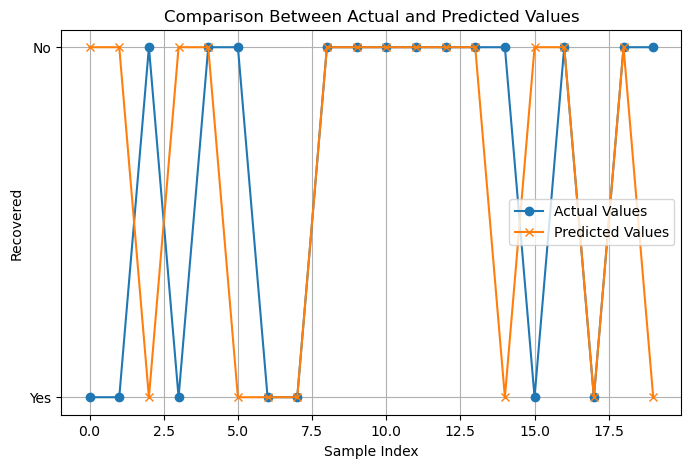

In [58]:
plt.figure(figsize=(8, 5))
plt.plot(y_test.values[:20], label="Actual Values", marker='o')
plt.plot(y_pred[:20], label="Predicted Values", marker='x')
plt.title("Comparison Between Actual and Predicted Values")
plt.xlabel("Sample Index")
plt.ylabel("Recovered")
plt.legend()
plt.grid(True)
plt.show()
